In [96]:
import numpy as np
import pandas as pd
#!pip install missingno

In [97]:
import warnings
warnings.filterwarnings('ignore')


In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import calendar

In [99]:
stores=pd.read_csv(r"C:\Users\shrimantas\Downloads\New folder\hackathon\stores.csv") #store data
ext=pd.read_csv(r"C:\Users\shrimantas\Downloads\New folder\hackathon\external_data.csv")
sales=pd.read_csv(r"C:\Users\shrimantas\Downloads\New folder\hackathon\sales.csv")

In [100]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
dtypes: int64(1), object(1)
memory usage: 848.0+ bytes


In [101]:
ext.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Store        8190 non-null   int64  
 1   Date         8190 non-null   object 
 2   Temperature  8190 non-null   float64
 3   Fuel_Price   8190 non-null   float64
 4   PROMO1       4032 non-null   float64
 5   PROMO2       2921 non-null   float64
 6   PROMO3       3613 non-null   float64
 7   PROMO4       3464 non-null   float64
 8   PROMO5       4050 non-null   float64
 9   CPI          7605 non-null   float64
 10  IsHoliday    8190 non-null   bool   
dtypes: bool(1), float64(8), int64(1), object(1)
memory usage: 648.0+ KB


In [102]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383040 entries, 0 to 383039
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         383040 non-null  int64  
 1   Dept          383040 non-null  int64  
 2   Date          383040 non-null  object 
 3   Weekly_Sales  383040 non-null  float64
 4   IsHoliday     383040 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 12.1+ MB


In [103]:
sales_group= sales.groupby(['Store','Date'])[['Weekly_Sales']].sum()
sales_group.reset_index(inplace=True)
sales_group.head()

,Store,Date,Weekly_Sales
0,1,1/13/2012,1459601.17
1,1,1/14/2011,1391013.96
2,1,1/20/2012,1394393.84
3,1,1/21/2011,1327405.42
4,1,1/27/2012,1319325.59


In [104]:
sales.size

1915200

In [105]:
sales_group.size

17550

In [106]:
df=sales_group.merge(stores, how='inner').merge(ext, how='inner')
df.head()


,Store,Date,Weekly_Sales,Type,Temperature,Fuel_Price,PROMO1,PROMO2,PROMO3,PROMO4,PROMO5,CPI,IsHoliday
0,1,1/13/2012,1459601.17,A,48.53,3.261,5183.29,8025.87,42.24,453.08,3719.38,219.892526,False
1,1,1/14/2011,1391013.96,A,35.40,2.983,NaN,NaN,NaN,NaN,NaN,211.457411,False
2,1,1/20/2012,1394393.84,A,54.11,3.268,4139.87,2807.19,33.88,500.62,3400.21,219.985689,False
3,1,1/21/2011,1327405.42,A,44.04,3.016,NaN,NaN,NaN,NaN,NaN,211.827234,False
4,1,1/27/2012,1319325.59,A,54.26,3.290,1164.46,1082.74,44.00,11.00,1222.19,220.078852,False


In [107]:
df.shape

(5850, 13)

In [108]:
sales.shape

(383040, 5)

In [109]:
df['date']=pd.to_datetime(df['Date'])
df['year']=pd.to_datetime(df['Date']).dt.year
df['month']=pd.to_datetime(df['Date']).dt.month
df['week']=pd.to_datetime(df['Date']).dt.week
df['day']=pd.to_datetime(df['Date']).dt.day
df['month']=df['month'].apply(lambda x:calendar.month_abbr[x])

In [110]:
df.head()

,Store,Date,Weekly_Sales,Type,Temperature,Fuel_Price,PROMO1,PROMO2,PROMO3,PROMO4,PROMO5,CPI,IsHoliday,date,year,month,week,day
0,1,1/13/2012,1459601.17,A,48.53,3.261,5183.29,8025.87,42.24,453.08,3719.38,219.892526,False,2012-01-13,2012,Jan,2,13
1,1,1/14/2011,1391013.96,A,35.40,2.983,NaN,NaN,NaN,NaN,NaN,211.457411,False,2011-01-14,2011,Jan,2,14
2,1,1/20/2012,1394393.84,A,54.11,3.268,4139.87,2807.19,33.88,500.62,3400.21,219.985689,False,2012-01-20,2012,Jan,3,20
3,1,1/21/2011,1327405.42,A,44.04,3.016,NaN,NaN,NaN,NaN,NaN,211.827234,False,2011-01-21,2011,Jan,3,21
4,1,1/27/2012,1319325.59,A,54.26,3.290,1164.46,1082.74,44.00,11.00,1222.19,220.078852,False,2012-01-27,2012,Jan,4,27


##### except the promo, no other column has missing value

In [111]:
#convert isholiday to binary

df['IsHoliday']=df['IsHoliday'].apply(lambda x:1 if x==True else 0)

### Feature Engineering

In [112]:
# Outlier removal

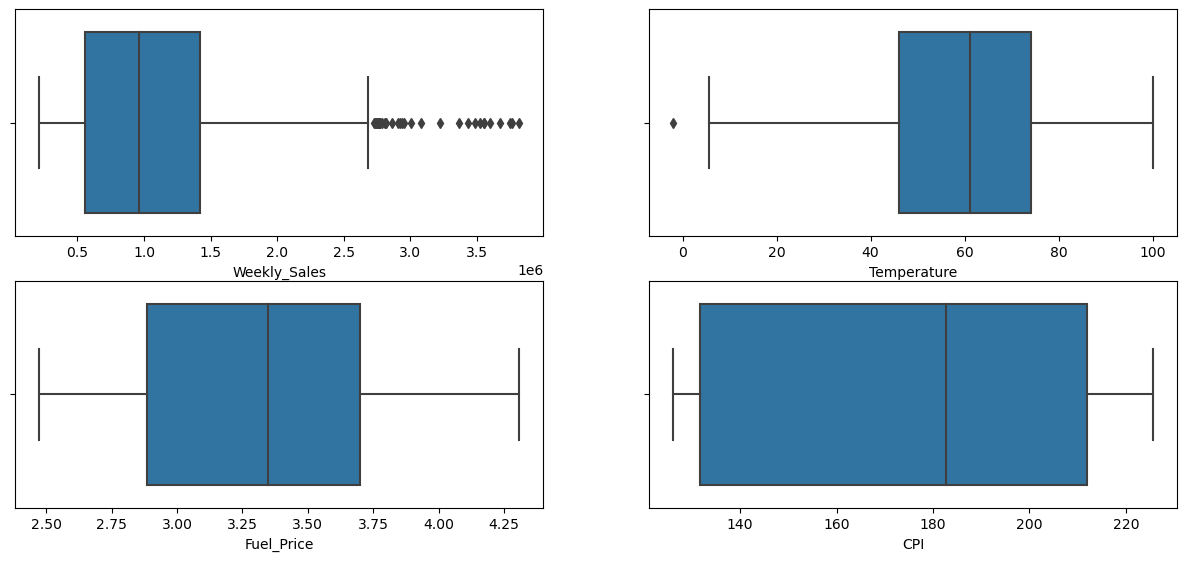

In [113]:
n = 1
cols =["Weekly_Sales","Temperature","Fuel_Price","CPI"]
plt.figure(figsize=(15,10))
for i in cols:
        if n<=5:
            plt.subplot(3,2,n);
            n+=1
            sns.boxplot(x = df[i])
            plt.xlabel(i)


In [114]:
l = ["Weekly_Sales","Temperature"]
def outlier_removal(l):
    for i in l:
        Q1  = df[i].quantile(0.25)
        Q3  = df[i].quantile(0.75)
        IQR = Q3-Q1
        Uper = Q3+1.5*IQR
        lower = Q1-1.5*IQR
        df[i]  = np.where(df[i]>Uper,Uper,(np.where(df[i]<lower,lower,df[i])))
outlier_removal(l)

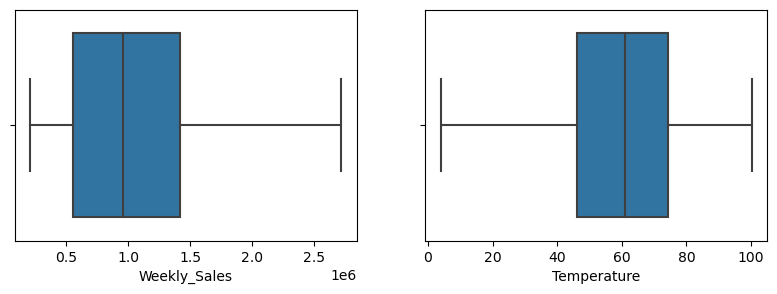

In [115]:
n = 1
cols =["Weekly_Sales","Temperature"]
plt.figure(figsize=(15,3))
for i in cols:
        if n<=3:
            plt.subplot(1,3,n);
            n+=1
            sns.boxplot(x = df[i])
            plt.xlabel(i)

In [116]:
# Treating missing values

In [117]:
df.PROMO1=df.PROMO1.map(lambda x: np.nan if x==-500 else x)
df.PROMO2=df.PROMO2.map(lambda x: np.nan if x==-500 else x)
df.PROMO3=df.PROMO3.map(lambda x: np.nan if x==-500 else x)
df.PROMO4=df.PROMO4.map(lambda x: np.nan if x==-500 else x)
df.PROMO5=df.PROMO5.map(lambda x: np.nan if x==-500 else x)


In [118]:
missing_cols = ['PROMO1','PROMO2','PROMO3','PROMO4','PROMO5']


impute_cols = [c for c in df.columns if not c in ['Weekly_Sales','date','Date','Type','month']+missing_cols]
data_imputed=df.copy()

In [119]:
df2.head()

,Store,Date,Weekly_Sales,Type,Temperature,Fuel_Price,PROMO1,PROMO2,PROMO3,PROMO4,PROMO5,CPI,IsHoliday,date,year,month,week,day,month_number
0,1,1/13/2012,1459601.17,A,48.53,3.261,5183.2900,8025.8700,42.2400,453.0800,3719.3800,219.892526,0,2012-01-13,2012,Jan,2,13,1
1,1,1/14/2011,1391013.96,A,35.40,2.983,4688.5968,9324.3084,42.9312,1606.1248,3905.1472,211.457411,0,2011-01-14,2011,Jan,2,14,1
2,1,1/20/2012,1394393.84,A,54.11,3.268,4139.8700,2807.1900,33.8800,500.6200,3400.2100,219.985689,0,2012-01-20,2012,Jan,3,20,1
3,1,1/21/2011,1327405.42,A,44.04,3.016,3113.8204,3028.7340,40.4336,431.9132,3859.1548,211.827234,0,2011-01-21,2011,Jan,3,21,1
4,1,1/27/2012,1319325.59,A,54.26,3.290,1164.4600,1082.7400,44.0000,11.0000,1222.1900,220.078852,0,2012-01-27,2012,Jan,4,27,1


In [120]:
df2.shape

(5850, 19)

In [121]:
df2.to_csv('df2.csv')

In [122]:
df3=pd.read_csv('df2.csv')

In [123]:
df3.head()

,Unnamed: 0,Store,Date,Weekly_Sales,Type,Temperature,Fuel_Price,PROMO1,PROMO2,PROMO3,PROMO4,PROMO5,CPI,IsHoliday,date,year,month,week,day,month_number
0,0,1,1/13/2012,1459601.17,A,48.53,3.261,5183.2900,8025.8700,42.2400,453.0800,3719.3800,219.892526,0,2012-01-13,2012,Jan,2,13,1
1,1,1,1/14/2011,1391013.96,A,35.40,2.983,4688.5968,9324.3084,42.9312,1606.1248,3905.1472,211.457411,0,2011-01-14,2011,Jan,2,14,1
2,2,1,1/20/2012,1394393.84,A,54.11,3.268,4139.8700,2807.1900,33.8800,500.6200,3400.2100,219.985689,0,2012-01-20,2012,Jan,3,20,1
3,3,1,1/21/2011,1327405.42,A,44.04,3.016,3113.8204,3028.7340,40.4336,431.9132,3859.1548,211.827234,0,2011-01-21,2011,Jan,3,21,1
4,4,1,1/27/2012,1319325.59,A,54.26,3.290,1164.4600,1082.7400,44.0000,11.0000,1222.1900,220.078852,0,2012-01-27,2012,Jan,4,27,1


### Exploring different Models

In [124]:
from time import strptime
df2['month_number'] = [strptime(str(x), '%b').tm_mon for x in df2['month']]

In [125]:
df3.head()

,Unnamed: 0,Store,Date,Weekly_Sales,Type,Temperature,Fuel_Price,PROMO1,PROMO2,PROMO3,PROMO4,PROMO5,CPI,IsHoliday,date,year,month,week,day,month_number
0,0,1,1/13/2012,1459601.17,A,48.53,3.261,5183.2900,8025.8700,42.2400,453.0800,3719.3800,219.892526,0,2012-01-13,2012,Jan,2,13,1
1,1,1,1/14/2011,1391013.96,A,35.40,2.983,4688.5968,9324.3084,42.9312,1606.1248,3905.1472,211.457411,0,2011-01-14,2011,Jan,2,14,1
2,2,1,1/20/2012,1394393.84,A,54.11,3.268,4139.8700,2807.1900,33.8800,500.6200,3400.2100,219.985689,0,2012-01-20,2012,Jan,3,20,1
3,3,1,1/21/2011,1327405.42,A,44.04,3.016,3113.8204,3028.7340,40.4336,431.9132,3859.1548,211.827234,0,2011-01-21,2011,Jan,3,21,1
4,4,1,1/27/2012,1319325.59,A,54.26,3.290,1164.4600,1082.7400,44.0000,11.0000,1222.1900,220.078852,0,2012-01-27,2012,Jan,4,27,1


In [126]:
x=df3.drop(['Weekly_Sales','date','Date','Type','month','PROMO4','Fuel_Price','day','PROMO3'],axis=1)
y=df3['Weekly_Sales']

In [127]:
x.head()

,Unnamed: 0,Store,Temperature,PROMO1,PROMO2,PROMO5,CPI,IsHoliday,year,week,month_number
0,0,1,48.53,5183.2900,8025.8700,3719.3800,219.892526,0,2012,2,1
1,1,1,35.40,4688.5968,9324.3084,3905.1472,211.457411,0,2011,2,1
2,2,1,54.11,4139.8700,2807.1900,3400.2100,219.985689,0,2012,3,1
3,3,1,44.04,3113.8204,3028.7340,3859.1548,211.827234,0,2011,3,1
4,4,1,54.26,1164.4600,1082.7400,1222.1900,220.078852,0,2012,4,1


In [128]:
y.head()

0    1459601.17
1    1391013.96
2    1394393.84
3    1327405.42
4    1319325.59
Name: Weekly_Sales, dtype: float64

In [129]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_scaled=st.fit_transform(x)

In [130]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [131]:
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.linear_model import LassoCV ,RidgeCV , ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score

In [132]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [133]:
def calculate_mape(actual, predicted):
    with np.errstate(divide='ignore', invalid='ignore'):
        mape = np.abs((actual - predicted) / actual)
        mape[actual == 0] = 0.0001  # Replace zero actual values with 0.0001 to avoid inf
        mape = np.mean(mape) * 100
    return mape


In [134]:
def model(y_test,y_train,x_test,x_train,model):
    
    model1 = model()
    model1.fit(x_train,y_train)
    y_pred = model1.predict(x_test)
    r2_score(y_test,y_pred)
    print('-----------------')
    print(model)
    print('-----------------')
    
    print(f'MSE: {mean_squared_error(y_test,y_pred)}')
    print(f'MAE: {mean_absolute_error(y_test,y_pred)}')
    
    print(f'R2 : {round(r2_score(y_test,y_pred)*100,2)} %')
    print(f'MAPE:{calculate_mape(y_test, y_pred)}')

In [135]:
x = [model(y_test,y_train,x_test,x_train,i) for i in [LinearRegression,Lasso,Ridge,ElasticNet,RandomForestRegressor,DecisionTreeRegressor,KNeighborsRegressor,GradientBoostingRegressor]]
x

-----------------
<class 'sklearn.linear_model._base.LinearRegression'>
-----------------
MSE: 252446049717.6078
MAE: 415545.16238219576
R2 : 19.78 %
MAPE:56.978348521435464
-----------------
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
-----------------
MSE: 252546609804.74066
MAE: 415616.34297986154
R2 : 19.74 %
MAPE:57.04449236777746
-----------------
<class 'sklearn.linear_model._ridge.Ridge'>
-----------------
MSE: 252528272807.16885
MAE: 415631.01770715945
R2 : 19.75 %
MAPE:57.0178982433744
-----------------
<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>
-----------------
MSE: 258201511997.7282
MAE: 422435.4733581771
R2 : 17.95 %
MAPE:58.31647287183972
-----------------
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
-----------------
MSE: 12205796829.461674
MAE: 59603.598262051295
R2 : 96.12 %
MAPE:5.547559039886659
-----------------
<class 'sklearn.tree._classes.DecisionTreeRegressor'>
-----------------
MSE: 20978192247.78939
MAE: 76083.62970

[None, None, None, None, None, None, None, None]

In [136]:
# Random forest gives greater accuracy, so let's proceed with that

In [137]:
model1 = RandomForestRegressor(n_estimators=100,random_state=42, max_features=6)
model1.fit(x_train,y_train)
y_pred = model1.predict(x_test)
r2_score(y_test,y_pred)
print(f'MAPE:{calculate_mape(y_test, y_pred)}')

MAPE:5.8555735888388805


In [142]:
l=pd.read_excel(r"C:\Users\shrimantas\Downloads\New folder\hackathon\hack.xlsx")
l.head()

,Unnamed: 0,Store,Temperature,PROMO1,PROMO2,PROMO5,CPI,IsHoliday,year,week,Weekly_Sales(Predicted)
0,1.0,1.0,86.11,27584.78,119.98,4661.71,221.949864,0.0,2012.0,31.0,572136.6979
1,2.0,2.0,90.22,27650.68,164.58,6652.98,221.586980,0.0,2012.0,31.0,1015418.7954
2,3.0,3.0,86.55,5683.49,37.20,639.29,225.463633,0.0,2012.0,31.0,1015418.7954
3,4.0,4.0,83.86,29127.20,42.27,10925.99,130.737871,0.0,2012.0,31.0,1015418.7954
4,5.0,5.0,86.91,7365.26,14.48,2517.31,222.538511,0.0,2012.0,31.0,1015418.7954


In [144]:
y_pred = model1.predict(l)
a=(y_pred)
print(a)
#print(f'MAPE:{calculate_mape(y_test, y_pred)}')

ValueError: could not convert string to float: '\u200b'

In [ ]:
print(type(a))

In [88]:

for i in a:
    print(i)

Store
Weekly_Sales
Temperature
Fuel_Price
PROMO1
PROMO2
PROMO3
PROMO4
PROMO5
CPI
IsHoliday
year
week
day
